# Predição de Valor de imóvel com *Regressão Linear*

In [16]:
#-- importando as libs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline 

Vamos usar o [Boston Housing Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) para prever valores de imóveis em Boston 

In [17]:
#-- carregando o dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [18]:
#-- printando o dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

O dataset vem em formato de dicionário - Precisamos transformar ele em DataFrame. Mas, antes vamos ver as descrições das variáveis. 

Como vejo as chaves de um dicionário?

In [19]:
#-- printando a chave do dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Vamos verificar a chave que descreve como o dataset está estruturado. É a chave `DESCR`.

In [20]:
#-- printando o descritivo do dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
#-- transformando o dicionário em dataframe
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Primeiro precisamos colocar a variável resposta no dataset

In [22]:
#-- incluinfo a variável resposta no dataset
boston_data['target'] = boston.target
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [23]:
#-- verificando as dimensões do dataset
boston_data.shape

(506, 14)

A descrição não estava mentido. Existem 506 registros e 14 colunas. Fizemos tudo certo até aqui

Qual dessas variáveis parece ser a mais importante? Conseguimos fazer alguma coisa para testar como a nossa variável resposta se comporta com outras variáveis?

### Análise Exploratória dos Dados

 - Análise exploratória serve para desvendar um pouco do processo gerador de dados. Quanto mais você souber sobre como os dados são gerados, melhor será suas chances de usar a técnica de modelagem mais adequada. Algumas análises são padrões em todos os processos de análise exploratória:
1. Análise de distribuição. Ex: qual a média, mínimo e máximo de cada variável
2. Análise de dados faltantes. Ex: Quais variáveis têm dados faltantes? Qual a proporção de dados faltantes por variável? Porque esses dados estão faltando? É um bug ou uma característica do processo gerador de dados?
3. Variáveis categóricas. Existem variáveis categóricas? Qual a cardinalidade das variáveis categóricas? As categorias são ordenadas ou sem ordem?
4. Correlação. Qual a correlação entre variáveis?

**Attribute Information (in order)** 

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - ** RM       average number of rooms per dwelling**
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - ** PTRATIO  pupil-teacher ratio by town **
 - B       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 - ** LSTAT lower status of the population **
 - MEDV     Median value of owner-occupied homes in $1000's

## Passo_1: Ajustar um modelo de reg lin simples utilizando a variavel RM
## Statsmodel

In [29]:
boston_data.describe().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


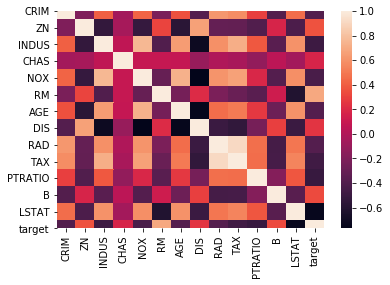

In [49]:
_ = sns.heatmap(boston_data.corr())

In [50]:
Y = boston_data['target']
X = boston_data['RM'].to_frame()

In [52]:
import statsmodels.api as sm

X = sm.add_constant(X) #adiciona a cte a base de dados
est7 = sm.OLS(Y, X)
est77 = est7.fit()
print(est77.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        21:28:11   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [54]:
Y_pred = est77.predict(X)

In [55]:
mse = sklearn.metrics.mean_squared_error(Y, Y_pred)
print(mse)

43.60055177116956


In [56]:
#Calculando o R^2
sklearn.metrics.r2_score(Y, Y_pred)

0.48352545599133423

## Passo_2: Ajustar um modelo de reg lin simples utilizando a variavel LSTAT
## Statsmodel

In [58]:
X = []
Y = []

In [64]:
boston_data.corr(boston_data['target'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [59]:
Y = boston_data['target']
X = boston_data['LSTAT'].to_frame()

In [60]:
X_1 = sm.add_constant(X) #adiciona a cte a base de dados
est7 = sm.OLS(Y, X_1)
est77 = est7.fit()
print(est77.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        21:36:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
Y_pred = est77.predict(X_1)

In [62]:
mse = sklearn.metrics.mean_squared_error(Y, Y_pred)
print(mse)

38.48296722989414


In [63]:
#Calculando o R^2
sklearn.metrics.r2_score(Y, Y_pred)

0.5441462975864799

## Passo_3: Ajustar um modelo de reg lin multipla utilizando as variaveis RM, PTRATIO e LSTAT
## Statsmodel

Esse modelo é melhor ou pior que os anteriores? Qual o melhor modelo?

## Passo_4: Ajustar um modelo de reg lin multipla utilizando todas as variaveis
## Statsmodel

### Vamos remover variáveis correlacionadas

In [ ]:
x = boston_data.drop.('target')

## Passo_5: Avaliar os residuos do modelo ajustado no passo 4
## Sklearn

## Outros desafios usando Regressão

 - [Kaggle: a first experience on Machine Learning and Regression Challenges](https://medium.com/@pramos/kaggle-a-first-experience-on-machine-learning-and-regression-challenges-446436901b7e)
 - [Predicting House Prices Playground Competition: Winning Kernels](http://blog.kaggle.com/2017/03/29/predicting-house-prices-playground-competition-winning-kernels/)